In [1]:
import tensorflow as tf
from tensorflow import keras as k
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,Activation
from keras.preprocessing.image import ImageDataGenerator as ig
from keras import optimizers
import scipy
import pylab
import matplotlib.cm as cm

Using TensorFlow backend.


In [2]:
test=r'C:\Users\hp\Amazon\Test'
train=r'C:\Users\hp\Amazon\Train'

In [3]:
#define dimension
input_dime=(150,150,3)
height=150
width=150
batch=28
epoch=3

In [4]:
datagen=ig(rescale=1./255)

In [5]:
train_gen=datagen.flow_from_directory(train,target_size=(width,height),batch_size=9,class_mode="categorical",color_mode='rgb',
                                     shuffle=True)
test_gen=datagen.flow_from_directory(test,target_size=(width,height),batch_size=9,class_mode="categorical",color_mode='rgb',
                                     shuffle=True)

Found 240 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [6]:
m= Sequential(name='Clothes')
m.add(Conv2D(16,(3,3),input_shape=input_dime))
m.add(Activation('relu'))
m.add(MaxPooling2D(pool_size=(2,2)))
m.add(Dropout(0.4))
m.add(Flatten())
m.add(Dense(10, activation='relu',name='layer1'))
m.add(Dropout(0.6))
m.add(Dense(3, activation='softmax',name='layer2'))
print("Summary:--\n",m.summary())

Model: "Clothes"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 16)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 74, 74, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 87616)             0         
_________________________________________________________________
layer1 (Dense)               (None, 10)                876170    
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0   

In [7]:
m.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [8]:
train_augumented=ig(rescale=1./255,shear_range=0.2,zoom_range=0.3,
                   rotation_range=45,horizontal_flip=True)
train_g_augumented=train_augumented.flow_from_directory(train,target_size=(width,height),batch_size=10,class_mode="categorical",color_mode='rgb',
                                     shuffle=True)

Found 240 images belonging to 3 classes.


In [9]:
#Train the model
results=m.fit(train_gen,epochs=10,validation_data=test_gen,steps_per_epoch=np.floor(train_gen.n//batch))

Epoch 1/10
8/8 [==============================] - 2s 200ms/step - loss: 2.7012 - accuracy: 0.2899 - val_loss: 1.0972 - val_accuracy: 0.3333
Epoch 2/10
8/8 [==============================] - 1s 162ms/step - loss: 1.0987 - accuracy: 0.3194 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 3/10
8/8 [==============================] - 1s 154ms/step - loss: 1.0990 - accuracy: 0.3194 - val_loss: 1.0970 - val_accuracy: 0.3333
Epoch 4/10
8/8 [==============================] - 1s 163ms/step - loss: 1.0989 - accuracy: 0.3623 - val_loss: 1.1010 - val_accuracy: 0.3333
Epoch 5/10
8/8 [==============================] - 1s 174ms/step - loss: 1.0984 - accuracy: 0.3750 - val_loss: 1.1006 - val_accuracy: 0.3333
Epoch 6/10
8/8 [==============================] - 1s 154ms/step - loss: 1.0993 - accuracy: 0.2778 - val_loss: 1.0966 - val_accuracy: 0.3333
Epoch 7/10
8/8 [==============================] - 1s 169ms/step - loss: 1.0990 - accuracy: 0.3056 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 8/10
8/8 [====

In [10]:
#getting the loss,accuracy,validation_loss and validation accuracy in dict form
res=results.history
res

{'val_loss': [1.0971555709838867,
  1.0986263751983643,
  1.0970443487167358,
  1.1009632349014282,
  1.100620150566101,
  1.0966423749923706,
  1.0986758470535278,
  1.0968217849731445,
  1.1021804809570312,
  1.0995845794677734],
 'val_accuracy': [0.3333333432674408,
  0.3333333432674408,
  0.3333333432674408,
  0.3333333432674408,
  0.3333333432674408,
  0.3333333432674408,
  0.3333333432674408,
  0.3333333432674408,
  0.3333333432674408,
  0.3333333432674408],
 'loss': [2.762795028479203,
  1.0986704975366592,
  1.0989806354045868,
  1.0990283230076665,
  1.0984076261520386,
  1.0993021577596664,
  1.09899041056633,
  1.0980868488550186,
  1.0989387184381485,
  1.0989369257636692],
 'accuracy': [0.28985506,
  0.31944445,
  0.31944445,
  0.36231884,
  0.375,
  0.2777778,
  0.30555555,
  0.3888889,
  0.30555555,
  0.3043478]}

In [11]:
loss=res['loss']
acc=res['accuracy']
valid_loss=res['val_loss']
val_acu=res['val_accuracy']
epoch=range(1,len(val_acu)+1)

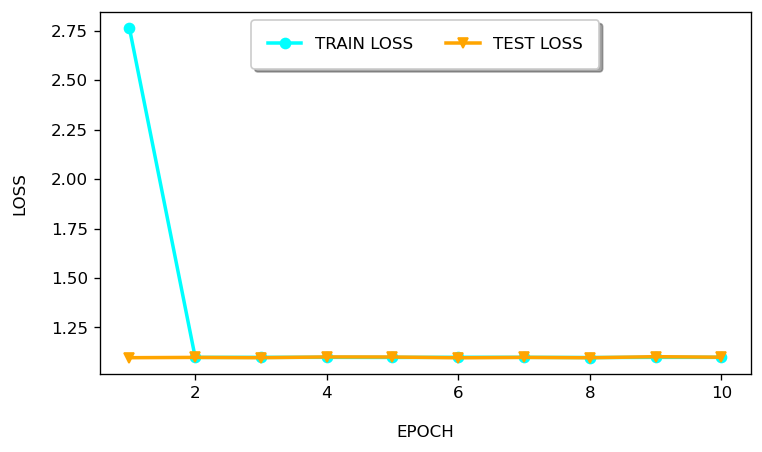

In [12]:
#PLOTTING LOSS VALUES
plt.figure(figsize=(7,4),dpi=120)
l1=plt.plot(epoch,loss,label="TRAIN LOSS")
l2=plt.plot(epoch,valid_loss,label="TEST LOSS")

plt.setp(l1,color='cyan',marker="o",linewidth=2.1)
plt.setp(l2,color='orange',marker="v",linewidth=2.1)

plt.xlabel('\nEPOCH')
plt.ylabel('LOSS\n')
plt.legend(loc='upper center', ncol=2,fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.show()

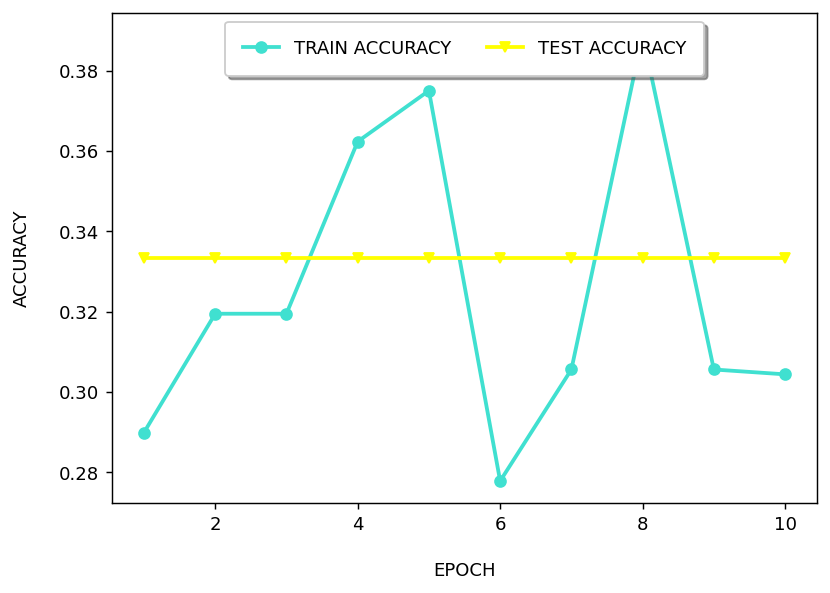

In [13]:
#PLOTTING ACCURACY VALUES
plt.figure(figsize=(7,5),dpi=130)
l1=plt.plot(epoch,acc,label="TRAIN ACCURACY")
l2=plt.plot(epoch,val_acu,label="TEST ACCURACY")

plt.setp(l1,color='turquoise',marker="o",linewidth=2.1)
plt.setp(l2,color='yellow',marker="v",linewidth=2.1)

plt.xlabel('\nEPOCH')
plt.ylabel('ACCURACY\n')
plt.legend(loc='upper center', ncol=2,fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.show()

Let's try with a random image

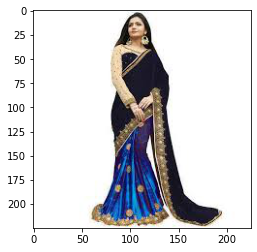

In [16]:
new=plt.imread('sareee.jpg')
img=plt.imshow(new)

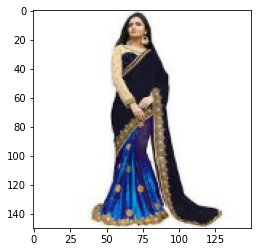

In [20]:
from skimage.transform import resize
resized_image=resize(new, (150,150,3))
img=plt.imshow(resized_image)

In [21]:
predictions = m.predict(np.array( [resized_image] ))
predictions

array([[0.3356704 , 0.33247975, 0.33184984]], dtype=float32)

In [29]:
classification = ['saree', 'shirt' , 'tshirt'] 
list_index = [0,1,2]
x = predictions
for i in range(3):
  for j in range(3):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

In [31]:
i=0
for i in range(3):
  print(classification[list_index[i]], ':', round(predictions[0][list_index[i]] * 100, 2), '%')

saree : 33.57 %
shirt : 33.25 %
tshirt : 33.18 %


In [25]:
#saving the model
m.save("AMAZON_CNN.h5")